In [1]:
import spacy
import en_core_web_sm
import nltk
from nltk.corpus import state_union

In [2]:
nlp = en_core_web_sm.load()

In [3]:
%%time
datedict = {}
for file in state_union.fileids():
    date = file[:4]
    doc = nlp(state_union.raw(file))
    locations = [X for X in doc.ents if X.text != '\n' and X.label_ in ['GPE', 'LOC']]
    datedict[date] = locations

CPU times: user 5min 34s, sys: 4min 39s, total: 10min 13s
Wall time: 2min 15s


In [4]:
locations = datedict['2006']
locations

[America,
 America,
 the United States of America,
 America,
 Afghanistan,
 Lebanon,
 Egypt,
 Syria,
 Burma,
 Zimbabwe,
 North Korea,
 Iran,
 the Middle East,
 Iraq,
 America,
 Beslan,
 London,
 Earth,
 The United States,
 America,
 Europe,
 Afghanistan,
 Iraq,
 Iraq,
 Washington,
 D.C.,
 Iraq,
 Iraq,
 America,
 United States,
 Washington,
 Fallujah,
 America,
 the United States of America,
 Middle East,
 Egypt,
 Israel,
 Saudi Arabia,
 the Middle East,
 the Middle East,
 the United States,
 Iran,
 Lebanon,
 America,
 Iran,
 America,
 Iran,
 the United States,
 America,
 America,
 the United States,
 America,
 America,
 Iraq,
 America,
 America,
 America,
 Japan,
 China,
 India,
 Washington,
 Keeping America,
 America,
 Keeping America,
 Keeping America,
 America,
 Keeping America,
 Keeping America,
 America,
 the Middle East,
 America,
 Middle Eastern,
 America,
 America,
 America,
 America,
 America,
 America,
 America,
 America,
 America,
 the United States,
 Washington,
 America,
 

In [5]:
import geocoder

In [6]:
%%time
coordinates = { X.text: geocoder.osm(X.text) for X in locations }
for x in coordinates.items():
    print(x)

('America', <[OK] Osm - Geocode [América, Resistencia, Departamento San Fernando, CCO, Argentina]>)
('the United States of America', <[OK] Osm - Geocode [USA]>)
('Afghanistan', <[OK] Osm - Geocode [افغانستان]>)
('Lebanon', <[OK] Osm - Geocode [لبنان]>)
('Egypt', <[OK] Osm - Geocode [مصر]>)
('Syria', <[OK] Osm - Geocode [سورية]>)
('Burma', <[OK] Osm - Geocode [မြန်မာ]>)
('Zimbabwe', <[OK] Osm - Geocode [Zimbabwe]>)
('North Korea', <[OK] Osm - Geocode [조선민주주의인민공화국]>)
('Iran', <[OK] Osm - Geocode [‏ایران‎]>)
('the Middle East', <[OK] Osm - Geocode [Middle East, Qalqilya, الشكاير, قلقيلية, محافظة قلقيلية, منطقة أ, יהודה ושומרון, 110, الأراضي الفلسطينية]>)
('Iraq', <[OK] Osm - Geocode [العراق]>)
('Beslan', <[OK] Osm - Geocode [Беслан, Правобережный район, Республика Северная Осетия — Алания, СКФО, РФ]>)
('London', <[OK] Osm - Geocode [London, Greater London, England, SW1A 2DU, UK]>)
('Earth', <[OK] Osm - Geocode [Earth, Lamb County, Texas, USA]>)
('The United States', <[OK] Osm - Geocode [U

In [8]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [9]:
latlngs = {}
for name,item in coordinates.items():
    if item.geojson['features']:
        latlngs[name] = Point(
            item.geojson['features'][0]['properties']['lng'],
            item.geojson['features'][0]['properties']['lat']
        )
latlngs

{'America': <shapely.geometry.point.Point at 0x7f2b73200198>,
 'the United States of America': <shapely.geometry.point.Point at 0x7f2b73200278>,
 'Afghanistan': <shapely.geometry.point.Point at 0x7f2b732002b0>,
 'Lebanon': <shapely.geometry.point.Point at 0x7f2b732002e8>,
 'Egypt': <shapely.geometry.point.Point at 0x7f2b73200320>,
 'Syria': <shapely.geometry.point.Point at 0x7f2b73200358>,
 'Burma': <shapely.geometry.point.Point at 0x7f2b73200390>,
 'Zimbabwe': <shapely.geometry.point.Point at 0x7f2b732003c8>,
 'North Korea': <shapely.geometry.point.Point at 0x7f2b73200400>,
 'Iran': <shapely.geometry.point.Point at 0x7f2b73200438>,
 'the Middle East': <shapely.geometry.point.Point at 0x7f2b73200470>,
 'Iraq': <shapely.geometry.point.Point at 0x7f2b732004a8>,
 'Beslan': <shapely.geometry.point.Point at 0x7f2b732004e0>,
 'London': <shapely.geometry.point.Point at 0x7f2b73200518>,
 'Earth': <shapely.geometry.point.Point at 0x7f2b73200550>,
 'The United States': <shapely.geometry.point.Po

In [10]:
#list(latlngs.values())

In [11]:
df = pd.DataFrame(list(latlngs.values()), index=list(latlngs.keys()), columns=['Coordinates'])
df

,Coordinates
America,POINT (-59.0017622330522 -27.4351024)
the United States of America,POINT (-100.4458825 39.7837304)
Afghanistan,POINT (66.2385139 33.7680065)
Lebanon,POINT (35.843409 33.8750629)
Egypt,POINT (29.2675469 26.2540493)
Syria,POINT (39.0494106 34.6401861)
Burma,POINT (95.99996520000001 17.1750495)
Zimbabwe,POINT (29.7468414 -18.4554963)
North Korea,POINT (127.0870417 40.3736611)
Iran,POINT (52.9471344 32.9407495)


In [12]:
import matplotlib.pyplot as plt

In [13]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

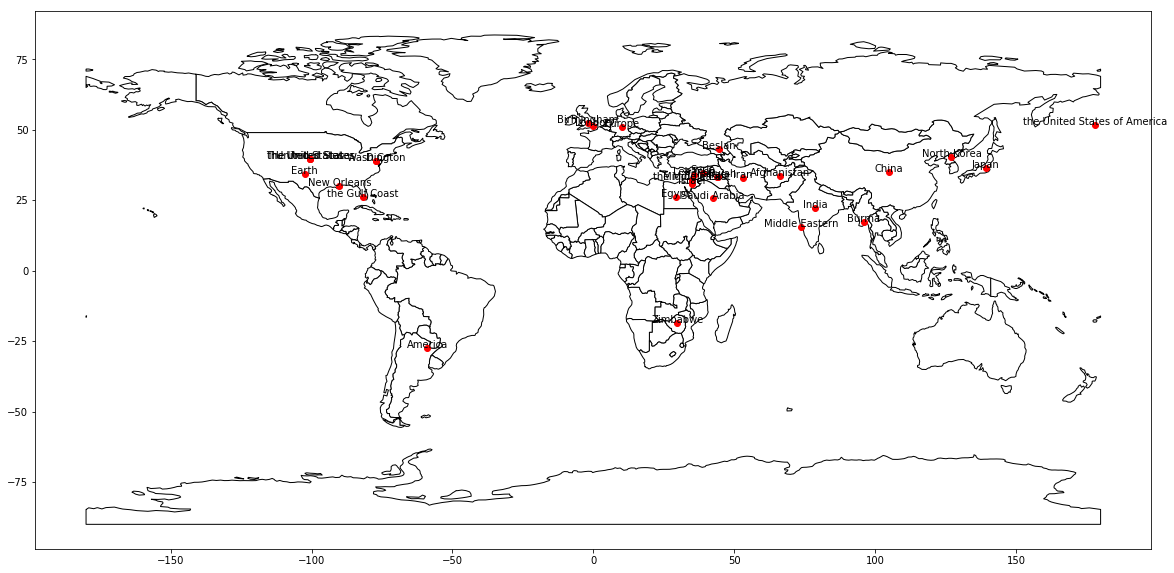

In [37]:
#!pip3 install descartes
ax = world.plot(
    color='white', edgecolor='black', figsize=(20,20)
)

gdf.plot(ax=ax, color='red')
for idx,row in gdf.iterrows():
    text_coords = [arr.tolist()[0] for arr in row.Coordinates.xy]
    plt.annotate(s=idx, xy=text_coords, horizontalalignment='center', size="medium")

#plt.xlim(-90, 90)
#plt.ylim(-90, 90)
plt.show()